<a href="https://colab.research.google.com/github/Shrushti72/coffee-sales/blob/main/Coffee_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

sns.set(style="whitegrid")


In [ ]:
# Connect to Google Drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Connect Dataset

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets_UnifiedMentor/CoffeeSalesData.csv')


In [ ]:
# Load Dataset

print(df.head())

         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


In [ ]:
# Checking Dataset Info

df.info()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


np.int64(0)

In [ ]:
# Convert to datetime:

df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])


In [ ]:
# Null values:

df['card'].fillna("CASH_USER", inplace=True)

In [ ]:
# Feature Engineering

df['month'] = df['date'].dt.to_period('M').astype(str)
df['day'] = df['date'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

In [ ]:
# Basic Insights

print("Total Transactions:", len(df))
print("Unique Coffee Types:", df['coffee_name'].nunique())
print(df['coffee_name'].value_counts())


Total Transactions: 1133
Unique Coffee Types: 8
coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: count, dtype: int64


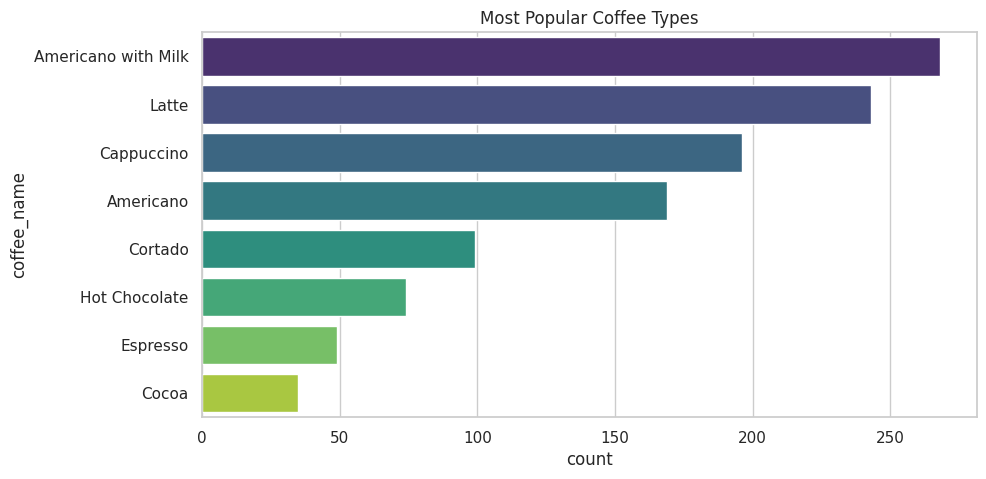

In [ ]:
# Sales by Coffee Type

plt.figure(figsize=(10,5))
sns.countplot(data=df, y='coffee_name', order=df['coffee_name'].value_counts().index, palette="viridis")
plt.title("Most Popular Coffee Types")
plt.show()


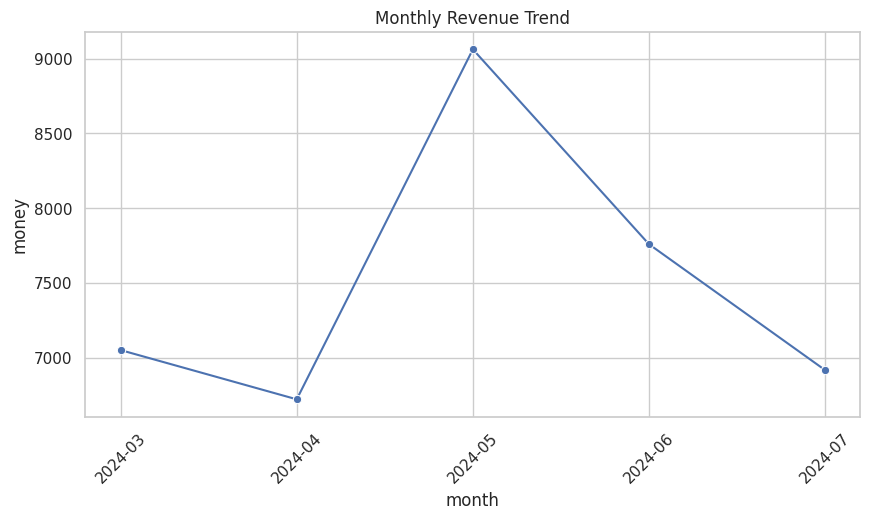

In [ ]:
# Monthly Sales Trend

monthly = df.groupby('month')['money'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly, x='month', y='money', marker="o")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.show()


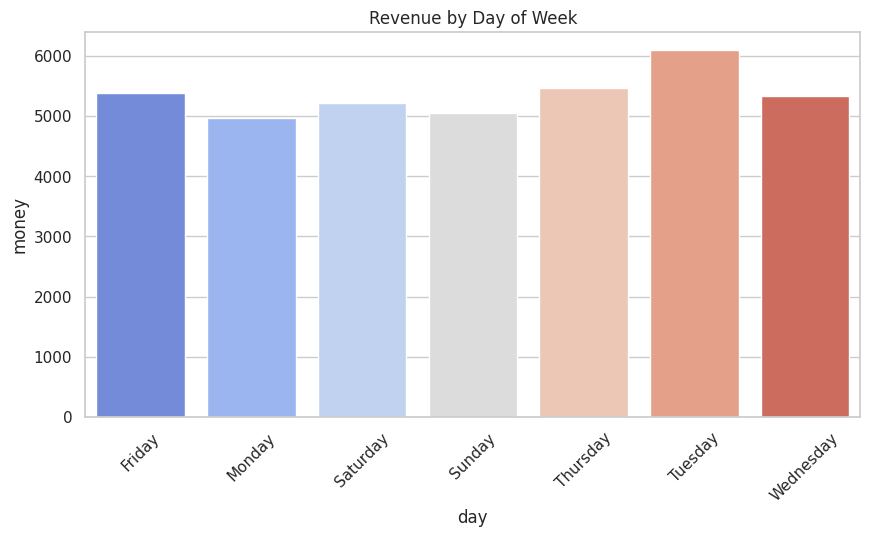

In [ ]:
# Sales by Weekday

weekday = df.groupby('day')['money'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=weekday, x='day', y='money', palette="coolwarm")
plt.title("Revenue by Day of Week")
plt.xticks(rotation=45)
plt.show()


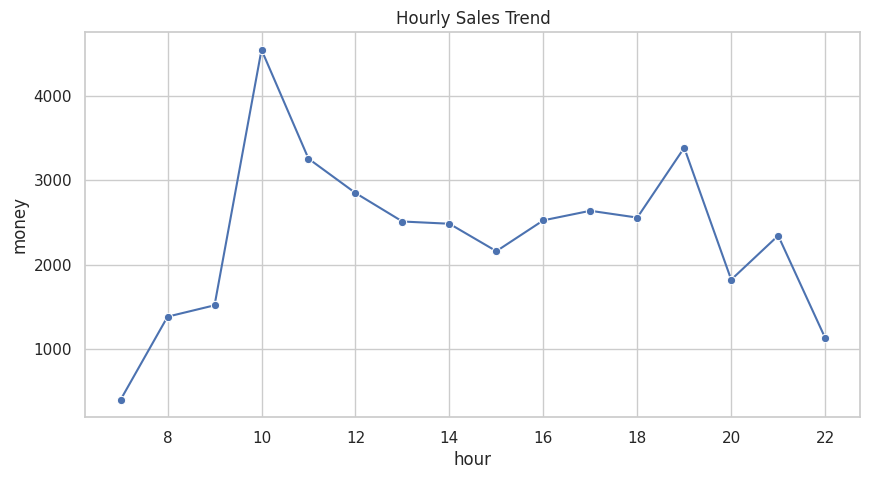

In [ ]:
# Hourly Traffic (Peak Hours)

hourly = df.groupby('hour')['money'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=hourly, x='hour', y='money', marker="o")
plt.title("Hourly Sales Trend")
plt.show()


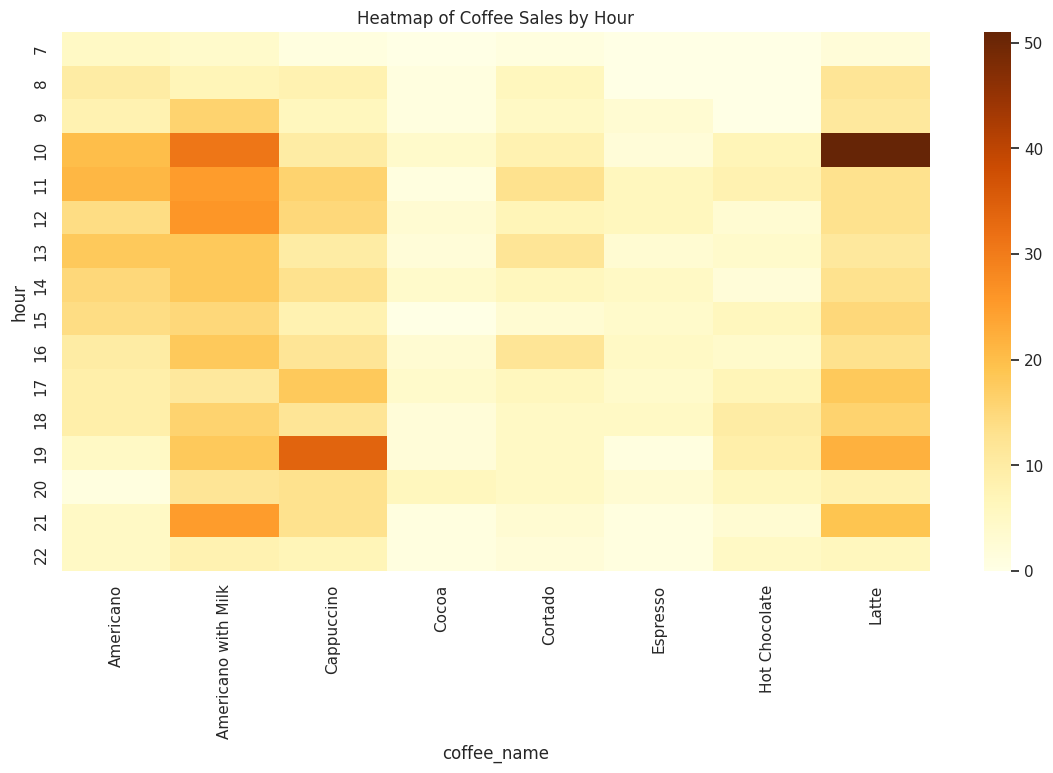

In [ ]:
# Heatmap (Product vs Hour)

pivot = df.pivot_table(index='hour', columns='coffee_name', values='money', aggfunc='count').fillna(0)
plt.figure(figsize=(14,7))
sns.heatmap(pivot, cmap="YlOrBr")
plt.title("Heatmap of Coffee Sales by Hour")
plt.show()


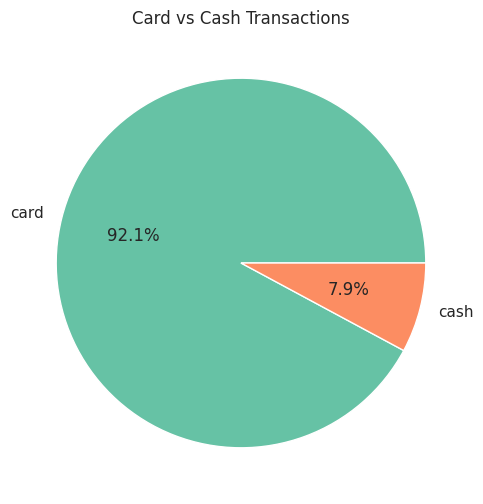

In [ ]:
# Customer Analysis (Card vs Cash)

df['cash_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colors=["#66c2a5","#fc8d62"])
plt.title("Card vs Cash Transactions")
plt.ylabel("")
plt.show()


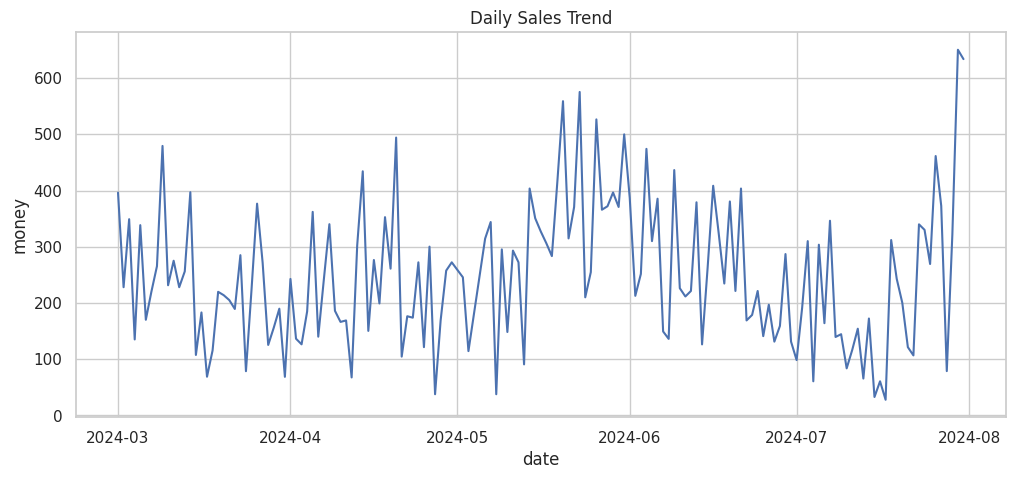

In [ ]:
# Time Series - Daily Sales

aily = df.groupby('date')['money'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=aily, x='date', y='money')
plt.title("Daily Sales Trend")
plt.show()

In [ ]:
# Summary

print("Key Insights:")
print("--------------------------------------")
print("1️] Latte & Americano with Milk are top-selling products.")
print("2️] Peak hours: 10 AM and 7 PM.")
print("3️] Tuesday has highest weekly sales.")
print("4️] Cash payments account for only ~8%.")
print("5️] Revenue increasing month-to-month (seasonal growth).")


Key Insights:
--------------------------------------
1️] Latte & Americano with Milk are top-selling products.
2️] Peak hours: 10 AM and 7 PM.
3️] Tuesday has highest weekly sales.
4️] Cash payments account for only ~8%.
5️] Revenue increasing month-to-month (seasonal growth).


In [ ]:
#Save Cleaned Dataset

df.to_csv('/content/cleaned_coffee_sales.csv', index=False)
print("Saved cleaned dataset!")


Saved cleaned dataset!
